In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## Example: flight delays on United

Let's look at an example of some publicly available data: delays of United flights out of SFO airport.  We found a spreadsheet with a long list of all United flights out of SFO, showing the destination for each flight, how long the delay was, and other information.  First we load the spreadsheet into Python:

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')

We can take a look at the first few rows of the data table:

In [3]:
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In this case, we have *all* the data for *all* flights.  Suppose we care about the delay to Los Angeles (LAX).  We have all of those flights, so we can compute the average delay, the median delay, and even visualize the delays:

In [4]:
la = united.where('Destination', 'LAX')

In [5]:
la

Date,Flight Number,Destination,Delay
6/1/15,433,LAX,10
6/1/15,478,LAX,0
6/1/15,525,LAX,-4
6/1/15,769,LAX,55
6/1/15,814,LAX,-3
6/1/15,1002,LAX,38
6/1/15,1083,LAX,98
6/1/15,1130,LAX,189
6/1/15,1192,LAX,-4
6/1/15,1591,LAX,0


In [6]:
la['Delay'].mean()

17.412271259418731

In [7]:
np.median(la['Delay'])

2.0

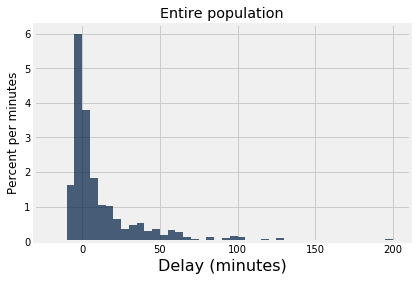

In [8]:
la.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Entire population')

## Sampling

Now let's look at what happens if take a random sample of flights.  Suppose we can't afford to measure the delay of every flight, so we pick a small random sample and measure their delays.  How close does this come to approximating the overall delay of all flights?

In [9]:
sample_of_10 = la.sample(10)

In [10]:
sample_of_10

Date,Flight Number,Destination,Delay
6/8/15,1756,LAX,8
8/5/15,478,LAX,-3
6/16/15,1579,LAX,13
6/29/15,1756,LAX,1
6/18/15,1498,LAX,16
8/20/15,1276,LAX,-5
8/8/15,1942,LAX,29
8/12/15,1710,LAX,99
7/19/15,281,LAX,10
8/13/15,1182,LAX,15


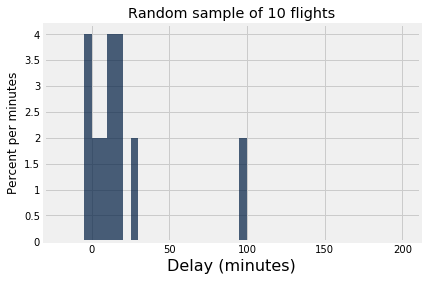

In [11]:
sample_of_10.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Random sample of 10 flights')

In [12]:
sample_of_100 = la.sample(100)

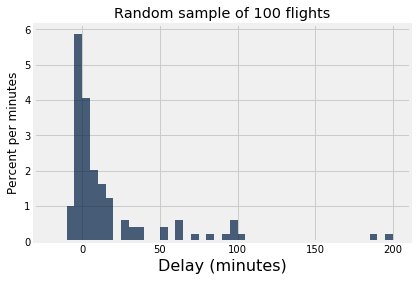

In [13]:
sample_of_100.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Random sample of 100 flights')

In [14]:
sample_of_1000 = la.sample(1000)

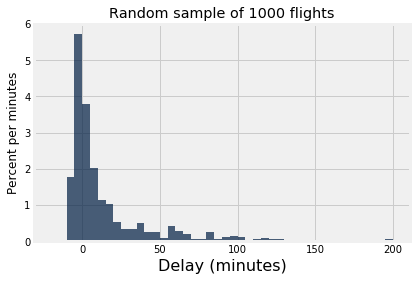

In [15]:
sample_of_1000.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Random sample of 1000 flights')

As you can see, the larger our sample, the more closely the distribution of data in our sample matches the distribution of the entire population of flights.

## A statistic

A *statistic* is some number computed from a random sample.  Usually, we use it to help us estimate something about the full population -- without seeing the full population.

Suppose we want to know the median delay for United flights from SFO to LAX.  If we have the whole population of all flights, we could just compute it:

In [16]:
np.median(la['Delay'])

2.0

But what if we can't afford to collect all that data, and we only have the delays for some randomly sampled flights?  We could take the median of the delays in the sample.

In [17]:
sample_of_100 = la.sample(100)
np.median(sample_of_100['Delay'])

2.0

In [18]:
another_sample_of_100 = la.sample(100)
np.median(another_sample_of_100['Delay'])

1.0

In [19]:
a_third_sample_of_100 = la.sample(100)
np.median(a_third_sample_of_100['Delay'])

4.5

You can see that we may get a different number each time.  And, it might not be the same as the median of the entire population.  Let's see how much it varies, by repeating the random sampling process 500 times and computing the median of the sample (the statistic) for each sample.  Then we'll visualize the results.

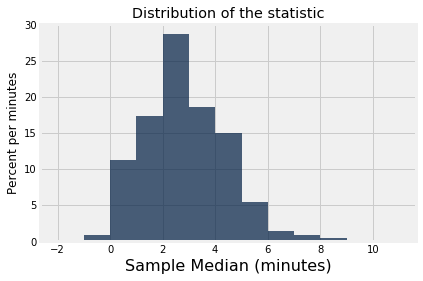

In [ ]:
medians = make_array()

for i in np.arange(5000):
    new_median = np.median(la.sample(100).column('Delay'))
    medians = np.append(medians, new_median)

sample_medians = Table().with_column('Sample Median', medians)

sample_medians.hist('Sample Median', unit='minutes', bins=np.arange(-2, 12, 1))
plots.title('Distribution of the statistic')

The median of the entire population (all United flights from SFO to LAX) was 2 minutes.  So we can see that by taking a random sample of 100 flights, we get a reasonable estimate -- the estimate (the statistic) is typically somewhere between 1-5 minutes, so it's fairly close to the right number.

What if we could afford to measure the delay for a larger sample, of size 1000 this time?  Let's see how accurate an estimate we'll get in this case.

In [ ]:
medians = make_array()

for i in np.arange(5000):
    new_median = np.median(la.sample(1000).column('Delay'))
    medians = np.append(medians, new_median)

sample_medians = Table().with_column('Sample Median', medians)

sample_medians.hist('Sample Median', unit='minutes', bins=np.arange(-2, 12, 1))
plots.title('Distribution of the statistic')

Now we have a much more accurate estimate: the estimate is typically in the range 2-3 minutes, while the correct answer is 2 minutes, so that's quite accurate.  The larger the sample, the more accurate the estimate.

Of course, in this case we were *simulating* a scenario.  In practice we usually draw a random sample because we don't have access to the full population -- so while we can compute a statistic from the sample, we won't have any way to know for sure how close it is to the true value.  In this simulation we did have the full population too, which enabled me to compare, but in real life you'll only have the random sample, so you won't be able to compare.  (We'll talk about methods for dealing with this tomorrow.)

## Distribution of the sample, vs distribution of the statistic

Let's keep separate three things: (a) the distribution of the population; (b) the distribution of a particular sample; (c) the distribution of the statistic (across many samples).

Here's the distribution of the population:

In [ ]:
la.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Entire population')

The distribution of a single sample:

In [ ]:
sample_of_10.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('A sample')

The distribution of a different sample:

In [ ]:
another_sample_of_10 = la.sample(10)
another_sample_of_10.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('Another sample')

The distribution of a third sample:

In [ ]:
third_sample_of_10 = la.sample(10)
third_sample_of_10.hist('Delay', unit='minutes', bins=np.arange(-20,201,5))
plots.title('A third sample')

And finally, the distribution of the statistic:

In [ ]:
medians = make_array()

for i in np.arange(5000):
    new_median = np.median(la.sample(10).column('Delay'))
    medians = np.append(medians, new_median)

sample_medians = Table().with_column('Sample Median', medians)

sample_medians.hist('Sample Median', unit='minutes', bins=np.arange(-20, 201, 5))
plots.title('Distribution of the statistic')